#Imports
Fonte do dataset utilizado: https://www.kaggle.com/datasets/annetxu/health-insurance-cost-prediction/data

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score   

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import tree

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_graphviz
from sklearn.preprocessing import LabelEncoder

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor


In [5]:
dados = pd.read_csv("insurance.csv", sep=",")
dados.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
dados.describe

<bound method NDFrame.describe of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

Validar se temos campos com nulos 

In [7]:
dados.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
#checando o que temos em region
dados["region"].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [9]:
dados["sex"].value_counts()


sex
male      676
female    662
Name: count, dtype: int64

In [10]:
dados["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

Sem campos nulos
Vamos checar as correlações

PS: aqui teremos um erro

In [11]:
#analisando correlações
#correlation_matrix = dados.corr().round(2)

#fig, ax = plt.subplots(figsize=(8,8))
#sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

Precisamos preparar o nosso dataset transformando os campos alpha em numéricos.

Para este passo vamos usar o label_encoder

Mas vamos preservar o dataset original e trabalhar com uma cópia.

In [12]:
set(dados['region'])

{'northeast', 'northwest', 'southeast', 'southwest'}

In [13]:
set(dados['sex'])

{'female', 'male'}

In [14]:
set(dados['smoker'])

{'no', 'yes'}

In [15]:
dados.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [16]:
#copiamos a base
dados_num = dados

In [17]:


# colunas com dados string
colunas=['sex','smoker','region']

# usamos o label_enconder para transformar os padrões strings em padrões numéricos
label_encoder = LabelEncoder()
for col in colunas:
    dados_num[col] = label_encoder.fit_transform(dados_num[col])
dados_num.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [18]:
dados_num.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


Vamos analisar o histograma do nosso dataset

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'region'}>],
       [<Axes: title={'center': 'charges'}>, <Axes: >, <Axes: >]],
      dtype=object)

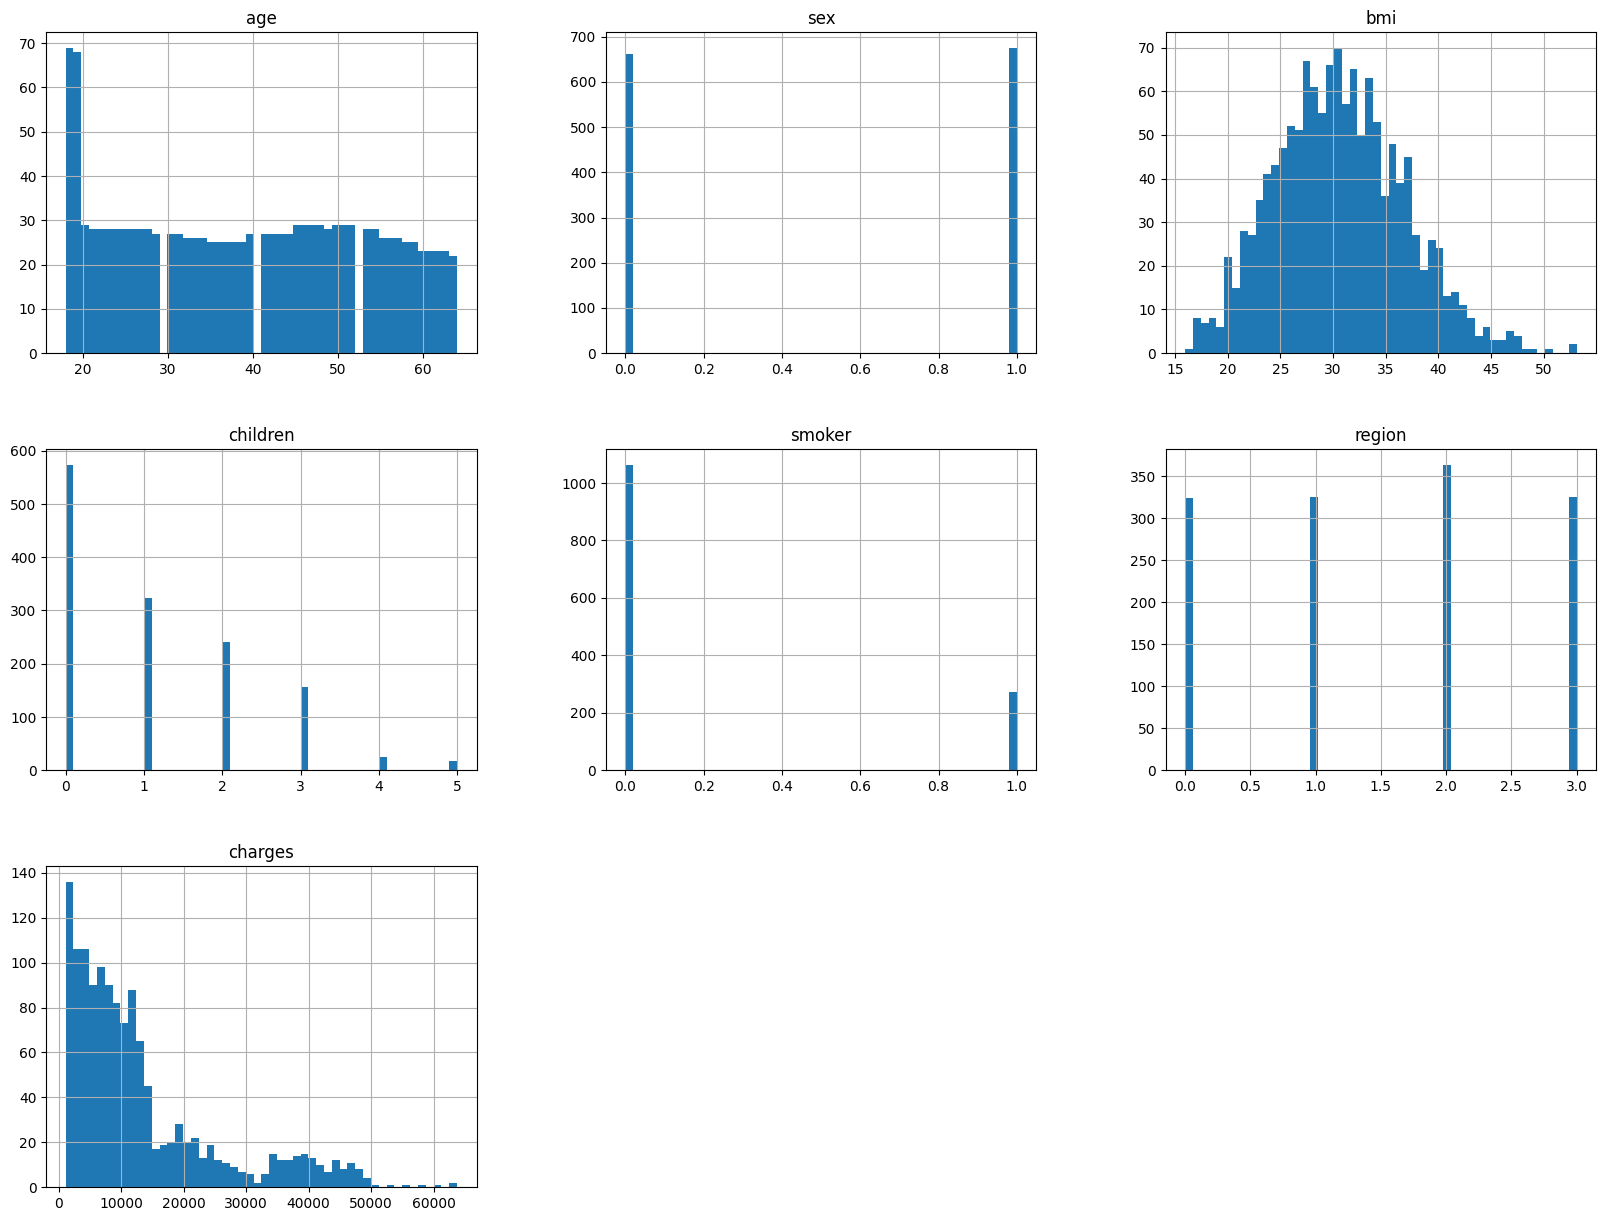

In [19]:
%matplotlib inline
dados_num.hist(bins=50, figsize=(20,15))

Agora podemos reexecutar o correlation

<Axes: >

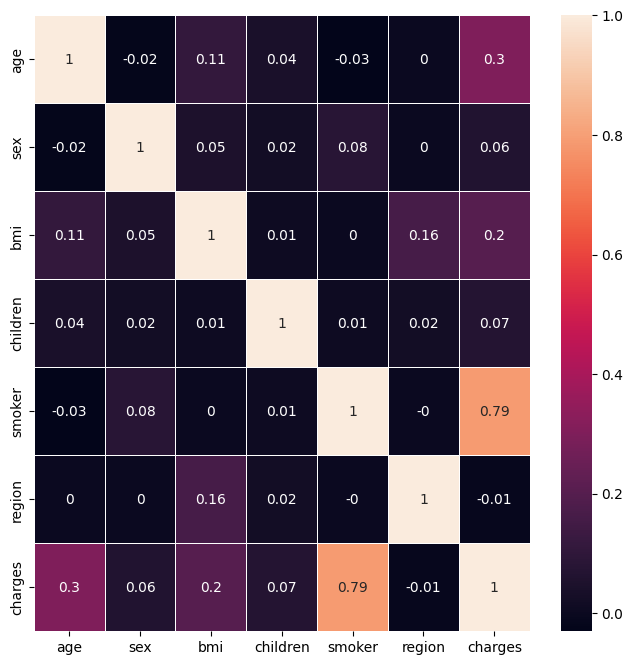

In [20]:
#analisando correlações
correlation_matrix = dados_num.corr().round(2)

fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

Podemos ver uma forte relação entre fumantes (smoker) e valores (charges).

Idade também é relevante, mas fumar é ainda mais forte a relação ... 

E o IMC (bmi) que tem leve influencia nos valores (charges).

Ponto curioso a relação entre IMC X Região (bmi x region), talvez um fator cultural.

Vamos verificar visualmente estas informações

In [21]:
import plotly_express as px
px.violin(dados, y="charges", x="smoker", color="smoker", box=True, points="all", hover_data=dados.columns)

Realmente o fator Fumante (smoker) influencia nos gastos (charges)

Vamos ver a relação com IMC (bmi)

In [22]:
import plotly_express as px
px.violin(dados, y="charges", x="bmi", color="bmi", box=True, points="all", hover_data=dados.columns)

Pela pluraridade dos valores de IMC (bmi) vamos tentar de outra visualização

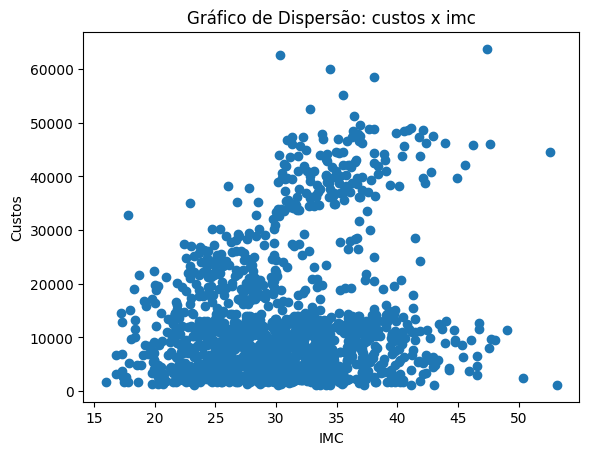

In [23]:
plt.scatter(dados['bmi'],dados['charges'])
plt.xlabel('IMC')
plt.ylabel('Custos')
plt.title('Gráfico de Dispersão: custos x imc')
plt.show()

Percebemos que a partir de IMC (bmi) maior que 30 os custos podem disparar ... 

Mas temos alguns outliers ... 

Vamos dar uma olhada na relação entre idade(age) e custos(charges)

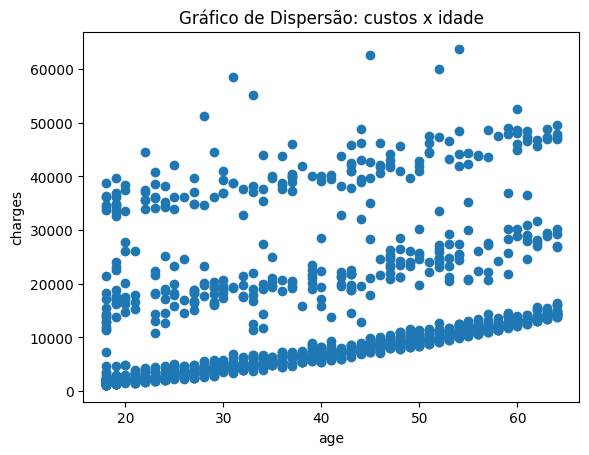

In [24]:
plt.scatter(dados['age'],dados['charges'])
plt.xlabel('age')
plt.ylabel('charges')
plt.title('Gráfico de Dispersão: custos x idade')
plt.show()

Percebemos que não temos uma faixa etária que impacta diretamente nos custos, mas temos, aparentemente, 3 grupos distintos de custos.

<Axes: xlabel='age', ylabel='charges'>

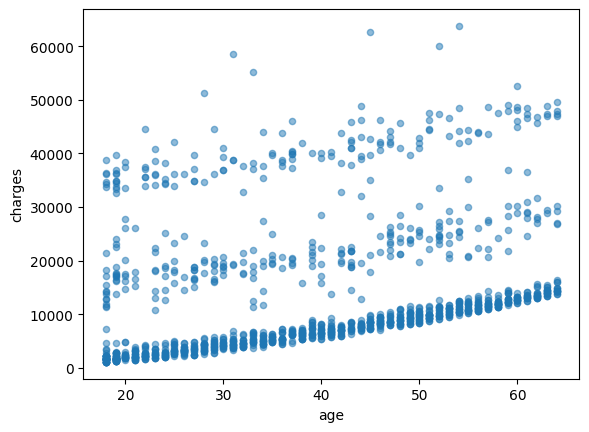

In [25]:
dados_num.plot(kind='scatter', x = 'age', y = 'charges', alpha = 0.5)

/home/mcgregory/Documents/Documentos/POS FiaP IA for DEVs/POS-FIAP/venv/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:1345: UserWarning:

No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored



<Axes: xlabel='age', ylabel='charges'>

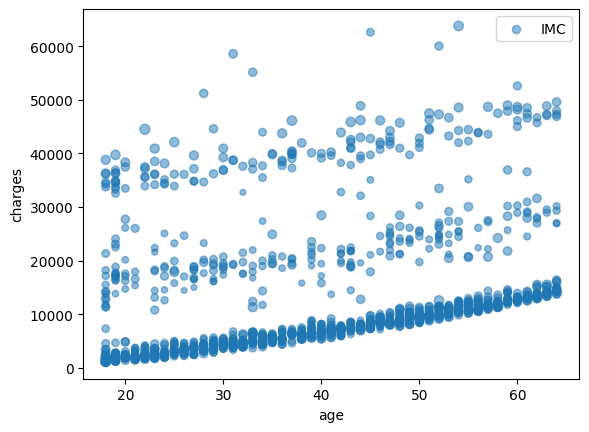

In [26]:
dados_num.plot(kind='scatter', x = 'age', y = 'charges', alpha = 0.5, colormap='cubehelix',
               s='bmi', label='IMC')

<Axes: xlabel='bmi'>

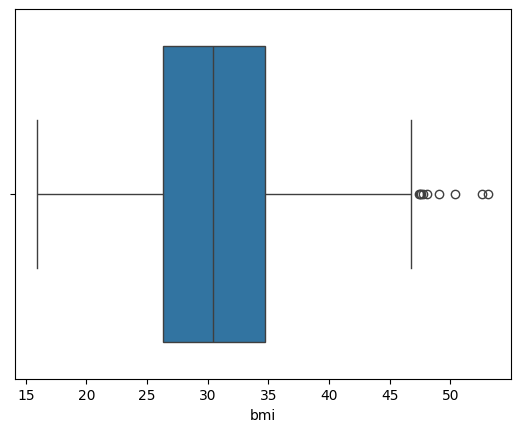

In [27]:
sns.boxplot(x=dados['bmi'])

vamos ver se temos outliers em custos (charges)

<Axes: xlabel='charges'>

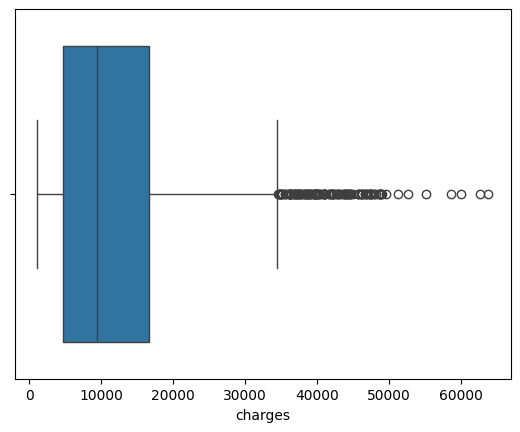

In [28]:
sns.boxplot(x=dados['charges'])

In [29]:
import plotly_express as px
px.violin(dados, y="charges", x="sex", color="sex", box=True, points="all", hover_data=dados.columns)

Vamos agora preparar as nossas predições.

Usaremos o dataset numérico.

Começando com a regressão linear simples.

In [30]:
x = dados_num[['age','sex','bmi','children', 'smoker','region']] #variaveis independentes
y = dados_num['charges'] #target

In [43]:
#Dividir os dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7) #80% treino e 20% teste

In [32]:
print(f"x_train shape {x_train.shape}")
print(f"x_test shape {x_test.shape}")
print(f"y_train shape {y_train.shape}")
print(f"y_test shape {y_test.shape}")

x_train shape (1070, 6)
x_test shape (268, 6)
y_train shape (1070,)
y_test shape (268,)


Agora vamos aplicar alguns métodos preditivos

In [33]:
modelo_LinearRegression = LinearRegression()
modelo_LinearRegression.fit(x_train, y_train)
pred_LinearRegression = modelo_LinearRegression.predict(x_test)
pred_LinearRegression


array([15162.30344181, 10957.01131676, -2038.95765864, 29000.79395181,
        9263.54809034,  2808.64262365, 26592.78965985,  3528.19309088,
        4110.20178306, 10494.94720751,  7510.96456602, 10030.16926231,
        1913.92561191,  3667.10632494, 13496.60619223, 12985.74277322,
        5647.70112878, 17284.91260072,  8775.24990676,  9489.39095938,
        7575.81966756,  1744.2344926 , 30383.66290114, 31500.20124695,
       28282.67962864, 31840.50035916, 36988.14214556, 30556.70649858,
        9764.1167072 , 10155.48159379, 12061.30471973, 32409.60461254,
        7132.10845537, 14481.98928629, 10081.21237455,  3563.02023663,
        4554.98363557,  8604.09260792, 12083.90312928,   -80.35178633,
        5520.38413291,  5889.77934163,  8036.27583328,  9730.45919976,
        8046.18676609,  2952.60974794,  6083.09979082, 35538.42308381,
       31620.51179737, 15156.01139299,  7457.32348699, 29408.68912555,
       10923.27921275, 10010.84728985,  4618.40451904, 33324.40440788,
      

In [34]:
LinReg_erro_medio_quadratico = mean_squared_error(y_test, pred_LinearRegression)
LinReg_erro_absoluto_medio = mean_absolute_error(y_test, pred_LinearRegression)
LinReg_erro_quadrado_Linear = r2_score(y_test, pred_LinearRegression)
print(f'erro médio quadratico: {LinReg_erro_medio_quadratico}')
print(f'erro absoluto médio: {LinReg_erro_absoluto_medio}')
print(f'erro quadrado: {LinReg_erro_quadrado_Linear}')


erro médio quadratico: 37677145.53247383
erro absoluto médio: 4284.701239383256
erro quadrado: 0.7644939656224733


Arvore de decisão

Vamos usar o mesmo dataset anterior.

In [35]:
modelo_dtree = DecisionTreeRegressor(max_depth=5, random_state=0)
modelo_dtree.fit(x_train, y_train)
pred_dtree = modelo_dtree.predict(x_test)


Checando os indices de erros.

In [36]:
dtree_erro_medio_quadratico = mean_squared_error(y_test, pred_dtree)
dtree_erro_absoluto_medio = mean_absolute_error(y_test, pred_dtree)
dtree_erro_quadrado_Linear = r2_score(y_test, pred_dtree)
print(f'erro médio quadratico: {dtree_erro_medio_quadratico}')
print(f'erro absoluto médio: {dtree_erro_absoluto_medio}')
print(f'erro quadrado: {dtree_erro_quadrado_Linear}')

erro médio quadratico: 24751837.264027037
erro absoluto médio: 2737.8172552505257
erro quadrado: 0.8452853326538573


Agora com o KNN (Predição por vizinhança)

Para usar o KNN precisamos escalonar nossos dados.

In [62]:
scaler = StandardScaler() 

dados_scl = dados
scaler.fit_transform(dados_scl)
x_scl = dados_scl[['age','sex','bmi','children', 'smoker','region']] #variaveis independentes
y_scl = dados_scl['charges'] #target
x_train_scl, x_test_scl, y_train_scl, y_test_scl = train_test_split(x_scl, y_scl, test_size=0.2, random_state=7) #80% treino e 20% teste
#x_train_scl = scaler.transform(x_train)
#x_test_scl = scaler.transform(x_test)

In [63]:
x_train_scl

,age,sex,bmi,children,smoker,region
1317,18,1,53.130,0,0,2
794,39,0,31.920,2,0,1
680,21,0,17.400,1,0,3
795,27,1,28.500,0,1,1
887,36,0,30.020,0,0,1
...,...,...,...,...,...,...
211,40,1,30.875,4,0,1
502,51,1,23.210,1,1,2
537,46,0,30.200,2,0,3
1220,30,0,21.945,1,0,0


In [84]:
from sklearn.neighbors import KNeighborsRegressor
knn_error = []

# Calculating error for K values between 1 and 10
for i in range(1, 10): #range de tentativas para k
    #knn = KNeighborsClassifier(n_neighbors=1)# aqui definimos  o k
    # após um bom tempo perdido, encontrei que o meu dataset funciona com o K
    knn = KNeighborsRegressor(n_neighbors=i)
    knn.fit(x_train_scl, y_train_scl) #treinando o algoritmo para encontrar o erro
    pred_i = knn.predict(x_test_scl) #armazenando as previsões
    knn_error.append(np.mean(pred_i != y_test_scl)) #armazenando o valor do erro médio na lista de erros

Text(0, 0.5, 'Mean Error')

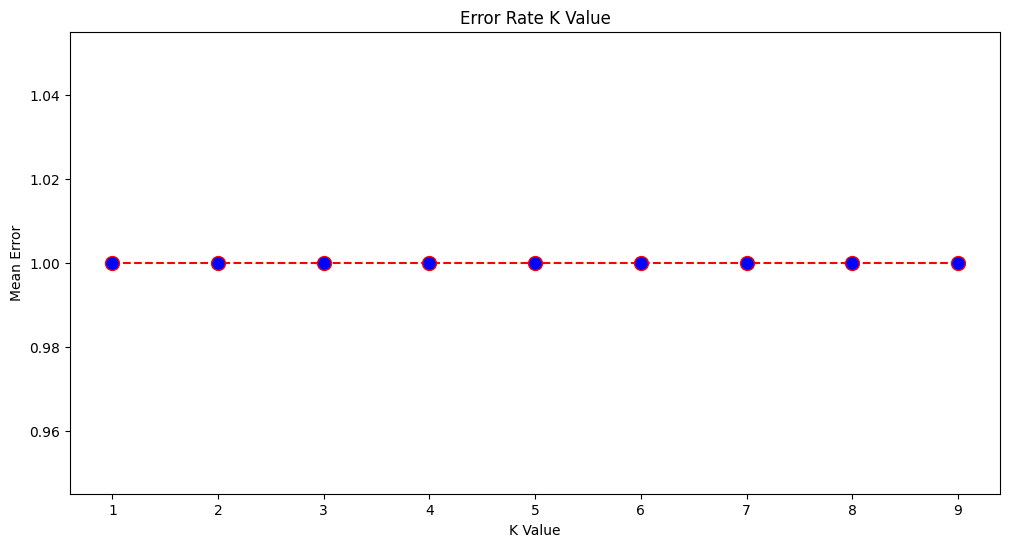

In [85]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 10), knn_error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

Meu dataset cada vez mais se mostra um pouco tendencioso ao modelo de regressão linear, não tivemos alteração no KNN para nenhum nivel de vizinhança.

Então vamos utilizar o valor 5.

In [87]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train_scl, y_train_scl) 
pred_knn = knn.predict(x_test_scl)

In [89]:
knn_erro_medio_quadratico = mean_squared_error(y_test_scl, pred_knn)
knn_erro_absoluto_medio = mean_absolute_error(y_test_scl, pred_knn)
knn_erro_quadrado_Linear = r2_score(y_test_scl, pred_knn)
print(f'erro médio quadratico: {knn_erro_medio_quadratico}')
print(f'erro absoluto médio: {knn_erro_absoluto_medio}')
print(f'erro quadrado: {knn_erro_quadrado_Linear}')

erro médio quadratico: 129155627.87058833
erro absoluto médio: 8052.580432364925
erro quadrado: 0.1926954840269005


Definitivamente KNN não é um bom modelo, mostrando que cada dataset pode ter um melhor metodo de treinamento.

Tivemos com o modelo de arvore de decisão um melhor resultado nas prediçoes, comparando com o regressão linear simples.

Agora vamos padronizar os nossos dados para testarmos outros metodos de predição


In [ ]:
mun_std_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), # não eh necessaria, ja checamos que nao temos nulos
    ('std_scaler', StandardScaler())
])

dados_num_target = dados_num['charges'] # preservamos o target (charges)

dados_num_tr = dados_num.drop('charges', axis=1) # removemos o target das features

dados_num_prep = mun_std_pipeline.fit_transform(dados_num_tr) # aplicamos o pipeline



In [ ]:
list(dados_num_tr)
dados_num_df = pd.DataFrame(data=dados_num_prep,columns=list(dados_num_tr))

In [ ]:
dados_num_df.head()

os campos sex e smoker, poderiam ficar com 0 ou 1. Vamos corrigir.

In [ ]:
#dados_num_df['sex'].where(dados_num_df['sex'] == 	-1.010519, 0, inplace=True)
#dados_num_df['smoker'].where(dados_num_df['smoker'] == 	1.970587, 1, inplace=True)

In [ ]:
#dados_num_df['sex'].where(dados_num_df['sex'] != 0, 1, inplace=True)
#dados_num_df['smoker'].where(dados_num_df['smoker'] != 1, 0, inplace=True)
dados_num_df.head()

Vamos separar o dataset em treino e teste

In [ ]:
#Dividir os dados em treino e teste
num_x_train, num_x_test, num_y_train, num_y_test = train_test_split(dados_num_df, dados_num_target, test_size=0.2, random_state=7) #80% treino e 20% teste

Aplicando LinearRegression

In [ ]:

modelo_LinearReg_df = LinearRegression()
modelo_LinearReg_df.fit(num_x_train, num_y_train)
pred_LinearReg_df = modelo_LinearRegression.predict(num_x_test)
pred_LinearReg_df

Avaliando

In [ ]:
LinReg_erro_medio_quadratico_df = mean_squared_error(num_y_test, pred_LinearReg_df)
LinReg_erro_absoluto_medio_df = mean_absolute_error(num_y_test, pred_LinearReg_df)
LinReg_erro_quadrado_Linear_df = r2_score(num_y_test, pred_LinearReg_df)


Para este dataset a padronização dos dados não foi eficaz. Abaixo as eficácias sem e com padronização:

In [ ]:
print('acuracia padronizada')
print(f'\terro médio quadratico: {LinReg_erro_medio_quadratico_df}')
print(f'\terro absoluto médio: {LinReg_erro_absoluto_medio_df}')
print(f'\terro quadrado: {LinReg_erro_quadrado_Linear_df}')
print('acuracia sem padronizar')
print(f'\terro médio quadratico: {LinReg_erro_medio_quadratico}')
print(f'\terro absoluto médio: {LinReg_erro_absoluto_medio}')
print(f'\terro quadrado: {LinReg_erro_quadrado_Linear}')


A acurárcia com os dados padronizados está muito diverso do esperado, talvez algum deslize no processo. Seguirei aqui com os dados originais.